Capstone Project

Emdadul Haque
Batch 9

Problem Case: CNN Model capable of recognizing digits in Photo

In [59]:
import h5py
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Conv2D,Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
file=h5py.File('SVHN_single_grey1.h5','r')

ls=list(file.keys())
print('datasets : \n',ls)

datasets : 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [3]:
x1test=list(file.keys())[0]
x1train=list(file.keys())[1]
x1val=list(file.keys())[2]
y1test=list(file.keys())[3]
y1train=list(file.keys())[4]
y1val=list(file.keys())[5]

In [5]:
# print(type(file[data]))

In [6]:
x1test_array=file[x1test][()]
x1train_array=file[x1train][()]
x1val_array=file[x1val][()]
y1test_array=file[y1test][()]
y1train_array=file[y1train][()]
y1val_array=file[y1val][()]

# print(x1test_array)

In [7]:
# print(ds_array.shape)
print(x1test_array.shape)

(18000, 32, 32)


In [8]:
print(x1train_array.shape)

(42000, 32, 32)


In [9]:
print(x1val_array.shape)

(60000, 32, 32)


In [10]:
print(y1test_array.shape)

(18000,)


In [11]:
print(y1train_array.shape)

(42000,)


In [12]:
print(y1val_array.shape)

(60000,)


In [123]:
# x11=x1test_array
# x11_r=np.array(x11)
# x11_r

In [13]:
# xr1_trainarray=x1train_array
# xr1_trainarray=np.reshape( xr1_trainarray,( xr1_trainarray.shape[0]))/255.0
    
xr1_trainarray=x1train_array
print(xr1_trainarray)

[[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

 [[ 86.9591  87.0685  88.3735 ...  91.8014  89.7477  92.5302]
  [ 86.688   86.9114  87.4337 ...  90.7306  87.204   88.5629]
  [ 85.9654  85.8145  85.9239 ...  63.8626  59.8199  54.8805]
  ...
  [ 90.2236  91.0448  93.4637 ...  55.3535  48.5822  44.0557]
  [ 90.6427  90.4039  90.937  ...  78.2696  77.4977  74.27  ]
  [ 88.0236  88.1977  86.6709 ...  75.2206  76.6396  79.2865]]

 [[123.125  125.8581 122.0757 ... 123.5747 124.1186 123.3144]
  [121.1683 124.1294 117.4613 ... 115.6078 119.5751 122.8306]
  [124.6132 121.1019 109.6623 ... 111.1783 119.7923 124.7595]
  ...
  [135.1391 127.3679 117.754  ...  95.0919 105.5

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler=MinMaxScaler()

In [55]:
# scaler.fit_transform(xr1_trainarray)

do obfuscate

In [10]:
file=h5py.File('SVHN_single_grey1.h5','r')

ls=list(file.keys())
print('datasets: \n',ls)

datasets: 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


First we get the dataset

In [12]:
df=file
list(df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

Converting Images to numpy array format

In [14]:
xtest=np.array(df['X_test'])
ytest=np.array(df['y_test'])
xval=np.array(df['X_val'])

xtrain=np.array(df['X_train'])
ytrain=np.array(df['y_train'])
yval=np.array(df['y_val'])

Looking at the input shape and data shape of images

In [15]:
xtrain[1]

array([[86.9591, 87.0685, 88.3735, ..., 91.8014, 89.7477, 92.5302],
       [86.688 , 86.9114, 87.4337, ..., 90.7306, 87.204 , 88.5629],
       [85.9654, 85.8145, 85.9239, ..., 63.8626, 59.8199, 54.8805],
       ...,
       [90.2236, 91.0448, 93.4637, ..., 55.3535, 48.5822, 44.0557],
       [90.6427, 90.4039, 90.937 , ..., 78.2696, 77.4977, 74.27  ],
       [88.0236, 88.1977, 86.6709, ..., 75.2206, 76.6396, 79.2865]],
      dtype=float32)

In [16]:
xtrain[5].shape

(32, 32)

In [17]:
xtrain.shape

(42000, 32, 32)

In [18]:
ytrain.shape

(42000,)

In [19]:
xtest.shape

(18000, 32, 32)

In [20]:
ytest.shape

(18000,)

In order to make calculation and Processing efficient we Normalize the data

In [21]:
xtrain=xtrain/255
xtest=xtest/255
xval=xval/255

image view 

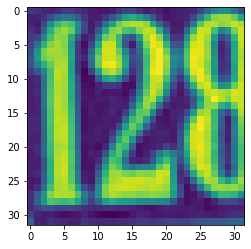

In [22]:
plt.imshow(xtrain[0])

We see that the images are RGB and has other colors around the edges. So, the plan is to create a 32X32X3 CNN Model with dense layers to recognize the digits with significant accuracy. 

1. First we create an Inoput Shape 32X32X3
2. We creade Hidden Layers
3. We look at the Features
4. We build the model based on the dataset with Hidden Layer, RELU, Convolution,Polling and Padding
5. from this we device the extraction layer
6. After creating model we train the model and fit the model.
7. Then we test the model for accuracy

Creating the model based on dataset and Image structure

- We are creating a 32 conv2D filter kernel
- We are creating a 64 conv 2D filter kernel
- We are creating Pooling, padding,Dropout
- Flatten
- Then Dense 64 layer
- Then Final output layer Dense 10 with softmax
- WE ave input layer 2 hidden layers and Ouput Layer

In [26]:
model=Sequential()
#Input Layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
# Hillden Layer 1
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#Hidden Layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
history=model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
1313/1313 [==============================] - 43s 33ms/step - loss: 0.1309 - accuracy: 0.9591
Epoch 2/15
1313/1313 [==============================] - 49s 37ms/step - loss: 0.1225 - accuracy: 0.9619
Epoch 3/15
1313/1313 [==============================] - 54s 41ms/step - loss: 0.1140 - accuracy: 0.9638
Epoch 4/15
1313/1313 [==============================] - 57s 43ms/step - loss: 0.1092 - accuracy: 0.9659
Epoch 5/15
1313/1313 [==============================] - 55s 42ms/step - loss: 0.1083 - accuracy: 0.9648
Epoch 6/15
1313/1313 [==============================] - 56s 43ms/step - loss: 0.0999 - accuracy: 0.9682
Epoch 7/15
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0989 - accuracy: 0.9675
Epoch 8/15
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0921 - accuracy: 0.9693
Epoch 9/15
1313/1313 [==============================] - 60s 45ms/step - loss: 0.0926 - accuracy: 0.9696
Epoch 10/15
1313/1313 [==============================] - 61s 46m

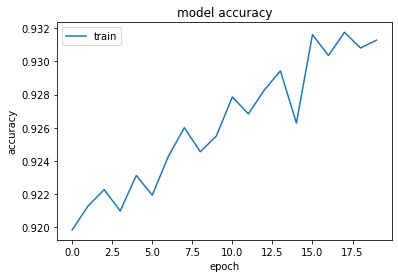

In [58]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [30]:
model.evaluate(xval,yval)

1875/1875 [==============================] - 16s 8ms/step - loss: 0.2190 - accuracy: 0.9378


[0.21904632449150085, 0.9378499984741211]

In [ ]:
model.evaluate(xtest,ytest)

563/563 [==============================] - 6s 10ms/step - loss: 0.3638 - accuracy: 0.9039


[0.3638301491737366, 0.9039444327354431]

We see our model needs to improve and we need to dropout some connections to improve daccuracy 

We go for min max scaler, dropout, accuracy, we will try reshape the dataset as well

MinMax Scaler

In [34]:
scaler=MinMaxScaler()

x1train=scaler.fit_transform(xtrain.reshape(-1,xtrain.shape[-1])).reshape(xtrain.shape)
x1test=scaler.transform(xtest.reshape(-1,xtest.shape[-1])).reshape(xtest.shape)
x1val=scaler.transform(xval.reshape(-1,xval.shape[-1])).reshape(xval.shape)

Model for the scaled data

In [38]:
model1=Sequential()

#Input Layer
model1.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model1.add(MaxPooling2D((2,2)))

#First Hidden Layer
model1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))

#Second Hidden Layer
model1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))

#The softtmax function uis used as the activation function in the output Layer of neura; network
#Models thatr redict a multinomial probability
model1.add(Dense(10,activation='softmax'))

In [39]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)         

In [42]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
model1.fit(x1train,ytrain,epochs=20)

Epoch 1/20
1313/1313 [==============================] - 36s 27ms/step - loss: 0.5479 - accuracy: 0.8363
Epoch 2/20
1313/1313 [==============================] - 41s 31ms/step - loss: 0.4774 - accuracy: 0.8541
Epoch 3/20
1313/1313 [==============================] - 46s 35ms/step - loss: 0.4336 - accuracy: 0.8688
Epoch 4/20
1313/1313 [==============================] - 51s 39ms/step - loss: 0.4053 - accuracy: 0.8768
Epoch 5/20
1313/1313 [==============================] - 55s 42ms/step - loss: 0.3821 - accuracy: 0.8837
Epoch 6/20
1313/1313 [==============================] - 56s 43ms/step - loss: 0.3629 - accuracy: 0.8883
Epoch 7/20
1313/1313 [==============================] - 58s 44ms/step - loss: 0.3496 - accuracy: 0.8932
Epoch 8/20
1313/1313 [==============================] - 58s 44ms/step - loss: 0.3371 - accuracy: 0.8955
Epoch 9/20
1313/1313 [==============================] - 65s 50ms/step - loss: 0.3220 - accuracy: 0.8996
Epoch 10/20
1313/1313 [==============================] - 68s 51m

In [44]:
model1.evaluate(x1val,yval)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.1853 - accuracy: 0.9481


[0.18532055616378784, 0.9480833411216736]

In [45]:
model1.evaluate(x1test,ytest)

563/563 [==============================] - 4s 7ms/step - loss: 0.2607 - accuracy: 0.9259


[0.260722815990448, 0.925944447517395]

In [49]:
history=model1.fit(x1train,ytrain,epochs=20)

Epoch 1/20
1313/1313 [==============================] - 34s 26ms/step - loss: 0.2547 - accuracy: 0.9198
Epoch 2/20
1313/1313 [==============================] - 42s 32ms/step - loss: 0.2510 - accuracy: 0.9213
Epoch 3/20
1313/1313 [==============================] - 45s 34ms/step - loss: 0.2491 - accuracy: 0.9223
Epoch 4/20
1313/1313 [==============================] - 48s 36ms/step - loss: 0.2498 - accuracy: 0.9210
Epoch 5/20
1313/1313 [==============================] - 48s 36ms/step - loss: 0.2449 - accuracy: 0.9231
Epoch 6/20
1313/1313 [==============================] - 52s 40ms/step - loss: 0.2438 - accuracy: 0.9219
Epoch 7/20
1313/1313 [==============================] - 52s 40ms/step - loss: 0.2392 - accuracy: 0.9243
Epoch 8/20
1313/1313 [==============================] - 53s 40ms/step - loss: 0.2363 - accuracy: 0.9260
Epoch 9/20
1313/1313 [==============================] - 54s 41ms/step - loss: 0.2359 - accuracy: 0.9245
Epoch 10/20
1313/1313 [==============================] - 53s 40m

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

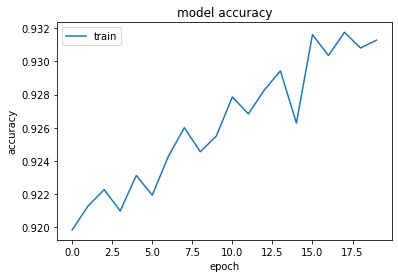

In [52]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

We see that in the first model we have not used normalization and scaling so the accuracy is less we run 15 epochs here the optimum values are loss: 0.1839 - accuracy: 0.9430, we further investigate 

keeping in mind the model may be overfit so we implement dropout and MinMax scaling and moreover incrose the epochs to 20, so we see with same parameter 72,842 we may have better acccuracy. 
Keep in mind we are using Drop outs this time solve overfit model possibility. To our concern we see, the accuracy is loss: 0.2577 - accuracy: 0.9183. Again we see that model evaluation accuracy is 
loss: 0.1853 - accuracy: 0.9481. This is an optimal level so we can use model 1 as a decent model for processing numbers from the dataset. 

Notice after 10 epochs in both the models the loss decreasing and accuracy increasing. The second model trained with 20 epochs is a good one however, much more tuning and customization
can be done and other approches is open to research that can improve the model, so far I eblieve my second model is descent and can predicts digits from image with 94.8 % accuracy.


Thank you for evaluating my Capstone Project use case and Solution ..... 